In [1]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from ase.build import graphene
from ase.io import write

[AirtilhndeJacob.home:65134] shmem: mmap: an error occurred while determining whether or not /var/folders/9y/xthk6v1524d_wtrmdw87dt7c0000gn/T//ompi.AirtilhndeJacob.501/jf.0/3656253440/sm_segment.AirtilhndeJacob.501.d9ee0000.0 could be created.


(examples:pacbed_quickstart)=
# PACBED quickstart

This notebook demonstrates a basic simulation of a position averaged convergent beam electron diffraction (PACBED) simulation of TODO

## Configuration

We start by (optionally) setting our configuration. See [documentation](reference:configuration) for details.

In [2]:
abtem.config.set(
    {
        "device": "cpu",
        "fft": "fftw",
        "diagnostics.task_progress": True,
        "diagnostics.progress_bar": "tqdm",
    }
)

## Atomic model
We import a model of SrTiO<sub>3</sub>. See our [walkthough](walkthrough:atomic_models) or our [tutorial](tutorials:advanced_atomic_models) on atomic models. 

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

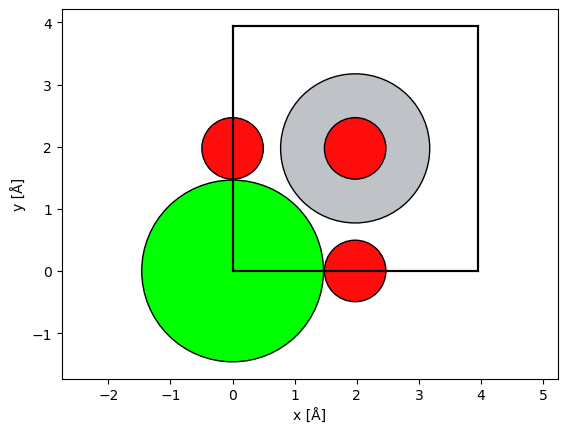

In [3]:
atoms = ase.io.read("data/SrTiO3.cif")

abtem.show_atoms(atoms)

## Crystal potential

In [4]:
potential_unit = abtem.Potential(atoms, slice_thickness=0.5, sampling=0.05)

In [5]:
repetitions_xy = 5
repetitions_z = 10

potential = abtem.CrystalPotential(
    potential_unit, repetitions=(repetitions_xy, repetitions_xy, repetitions_z)
)

In [6]:
# potential.show()

## Probe

In [7]:
probe = abtem.Probe(energy=100e3, semiangle_cutoff=30)

probe.grid.match(potential)

In [22]:
# probe.show()

## Scan

In [8]:
scan = abtem.GridScan(start=(0, 0), end=(repetitions_xy, repetitions_xy))

tasks:   0%|          | 0/2 [00:00<?, ?it/s]

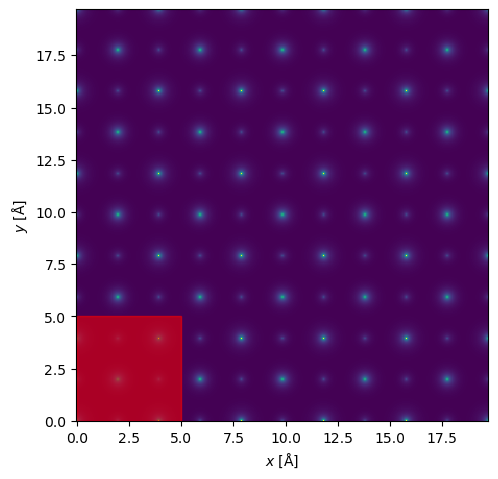

In [9]:
visualization = potential.show()

scan.add_to_plot(visualization)

## 

In [13]:
detector = abtem.PixelatedDetector()

In [14]:
measurement = probe.scan(scan=scan, potential=potential, detectors=detector)

In [16]:
measurement.compute()

tasks:   0%|          | 0/10 [00:00<?, ?it/s]

multislice:   0%|          | 0/3920 [00:00<?, ?it/s]

multislice:   0%|          | 0/5600 [00:00<?, ?it/s]

multislice:   0%|          | 0/5600 [00:00<?, ?it/s]

multislice:   0%|          | 0/8000 [00:00<?, ?it/s]